#Manchas Solares

In [1]:
!pip install wget
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=81b660eea5d952b252fe4fc88ba06b3cde386b13feec032a21e5ce9abf5738bb
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [2]:
file = 'ManchasSolares.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Descargado')
else:
    Path_ = file

100% [............................................................................] 134328 / 134328Descargado


In [3]:
data = np.loadtxt(Path_)

In [4]:
#se crea una máscara de los datos a partir de 1900
data = data[data[:,0]>=1900]
t = data[:,0] + data[:,1]/12
manchas = data[:,3]
mean = np.mean(manchas)
manchas_mean = manchas - mean

<StemContainer object of 3 artists>

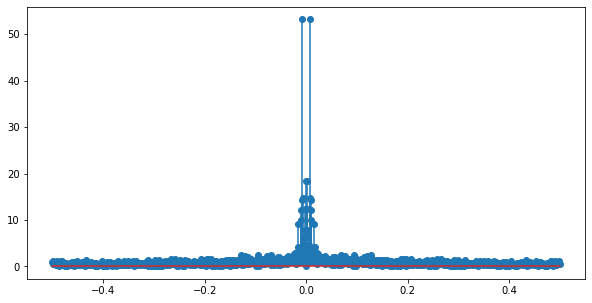

In [5]:
fft = np.fft.fft(manchas_mean) #Transformada de fourier que me da los coeficientes complejos Am
ffta = np.abs(fft)  #Norma de los coeficientes complejos
N = len(manchas_mean)
freq = np.fft.fftfreq(N)
#plt.scatter(freq, np.abs(fft/N))
fig = plt.figure(figsize=(10,5))
plt.stem(freq, 2*ffta/N, use_line_collection = True)

<StemContainer object of 3 artists>

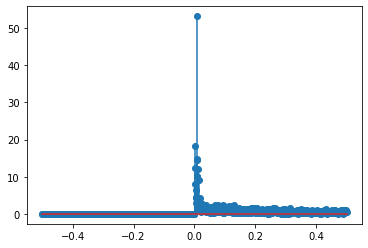

In [6]:
mask = freq < 0
fft_1 = fft.copy()
fft_1[mask] = 0
ffta_1 = np.abs(fft_1)
plt.stem(freq, 2*ffta_1/N, use_line_collection = True)

In [7]:
#Frecuencia dominante o fundamental
ii = np.argmax(ffta_1)
ffundamental = freq[ii]
T = (1./ffundamental)/12.0

In [8]:
#Se crea una máscara para que solo quede la frecuencia fundamental

i = np.abs(freq) > ffundamental
i_1 = np.abs(freq) < ffundamental

In [9]:
fft[i | i_1] = 0. #Se le pone la máscara al vector de la transformada de Fourier
ffta_f = np.abs(fft) #Se saca la norma (solo para verificar nuestro espectro de frecuencias)

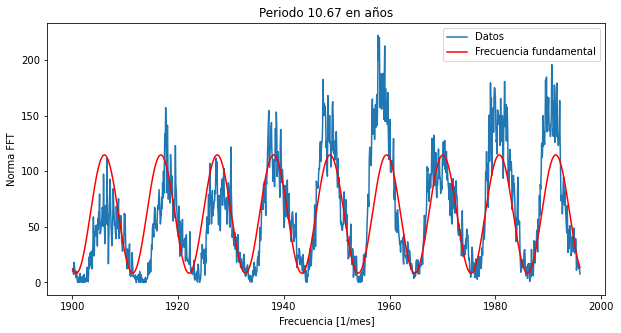

In [10]:
fft_inv = np.fft.ifft(fft)
manchas_fundamental = fft_inv

fig = plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
plt.title(r'Periodo {:.2f} en años'.format(T))
plt.plot(t, manchas, label = 'Datos')
plt.plot(t, np.real(manchas_fundamental) + mean, c='r',label = "Frecuencia fundamental")

plt.xlabel('Frecuencia [1/mes]')
plt.ylabel('Norma FFT')
plt.legend()